# M1 Exercise 3 – Keras 神经网络教学 Notebook

这个 Notebook 带你一步一步完成：
1. 用 Keras 训练一个网络拟合 XOR 输出（非线性分类）
2. 用 Keras 拟合二维函数 f(x, y)（回归问题）
3. 在 FashionMNIST 上做图像分类（简单版）

运行环境：
- Python 3.x
- TensorFlow / Keras
- Matplotlib, NumPy


In [1]:
# ==========================
# 基础环境 & 导入依赖库
# ==========================

# 数值计算
import numpy as np

# 画图
import matplotlib.pyplot as plt

# 深度学习框架：TensorFlow + Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 让打印更紧凑一点
np.set_printoptions(precision=4, suppress=True)

print("tensorflow version:", tf.__version__)


tensorflow version: 2.20.0


# 用 Keras 实现 XOR

## Part 1 – XOR in Keras

XOR（异或）真值表：

| x1 | x2 | y = x1 XOR x2 |
|----|----|----------------|
| 0  | 0  | 0              |
| 0  | 1  | 1              |
| 1  | 0  | 1              |
| 1  | 1  | 0              |

特点：
- 这是一个**线性不可分**的问题（无法用一条直线把 0 和 1 分开）
- 但是一个**带隐藏层的 MLP（多层感知机）**可以学会它

我们会做的事情：
1. 构造 XOR 数据集
2. 搭建一个只有一层隐藏层的网络（Dense + sigmoid）
3. 训练并观察 loss & accuracy
4. 可视化决策边界


In [2]:
# ==========================
# 构造 XOR 数据集
# ==========================

# 输入 X 是四个点：(0,0), (0,1), (1,0), (1,1)
X_xor = np.array([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
], dtype=np.float32)

# 输出 y 是对应的 XOR 结果：0, 1, 1, 0
y_xor = np.array([
    [0.],
    [1.],
    [1.],
    [0.]
], dtype=np.float32)

print("X_xor:\n", X_xor)
print("y_xor:\n", y_xor)


X_xor:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y_xor:
 [[0.]
 [1.]
 [1.]
 [0.]]


# 搭建一个带隐藏层的 XOR 网络（Code）

In [30]:
# ==========================
# 搭建 XOR 网络模型
# ==========================

# 为了方便复现结果，设置随机种子（可选）
tf.random.set_seed(42)
np.random.seed(42)

# 使用 Sequential 顺序模型
xor_model = keras.Sequential([
    # 隐藏层：
    # - units=2 表示有 2 个神经元（两个“感知机”）
    # - activation='sigmoid' 使用 sigmoid 激活，让网络具备非线性表达能力
    # - input_shape=(2,) 输入是二维向量 (x1, x2)
    layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),

    # 输出层：
    # - units=1 输出一个标量（属于类1的概率）
    # - activation='sigmoid' 把值压到 (0, 1) 区间方便做二分类
    layers.Dense(units=1, activation='sigmoid')
])

# 编译模型：
# - optimizer='sgd' 经典随机梯度下降
# - loss='binary_crossentropy' 二分类交叉熵
# - metrics=['accuracy'] 附带监控准确率
xor_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.7),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

# 查看一下模型结构
xor_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

# 训练 XOR 模型（Code）

In [33]:
# ==========================
# 训练 XOR 模型
# ==========================

# 我们用较小 epoch 方便观察过程，数据只有 4 个样本，所以 batch_size=4
history_xor = xor_model.fit(
    X_xor,
    y_xor,
    epochs=100,         # 训练轮数多一点，确保收敛
    batch_size=4,
    verbose=1           # 不在每个 epoch 都打印，下面自己画图
)

print("Final loss:", history_xor.history["loss"][-1])
print("Final accuracy:", history_xor.history["accuracy"][-1])


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0383
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0382
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0381
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0380
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0379
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0378
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0377
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0376
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0375
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0374
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0373
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - lo

# 画出 loss & accuracy 变化（Code）

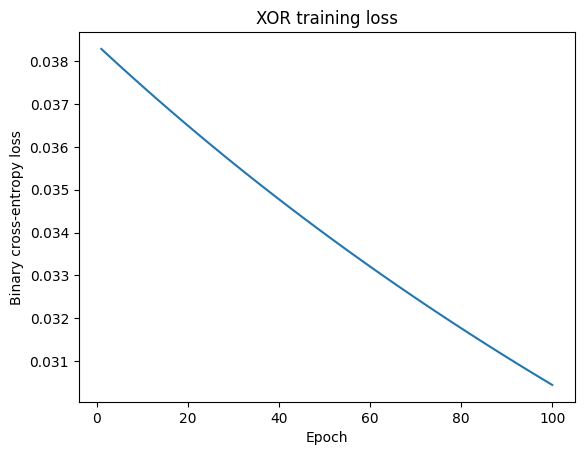

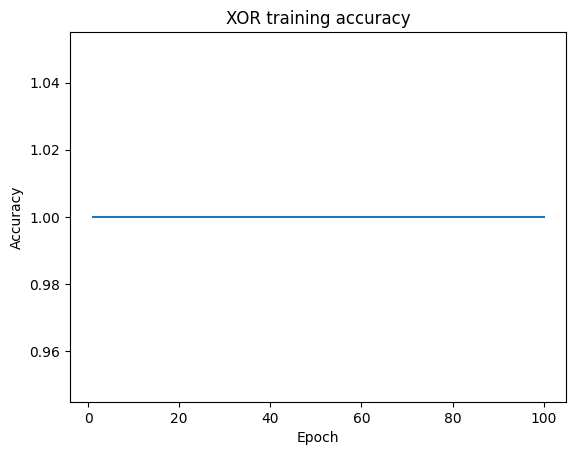

In [34]:
# ==========================
# 可视化 XOR 的训练过程
# ==========================

epochs = range(1, len(history_xor.history["loss"]) + 1)

plt.figure()
plt.plot(epochs, history_xor.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Binary cross-entropy loss")
plt.title("XOR training loss")
plt.show()

plt.figure()
plt.plot(epochs, history_xor.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("XOR training accuracy")
plt.show()


# 查看每个输入的预测值（Code）

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted probabilities:
 [[0.02  ]
 [0.9738]
 [0.9728]
 [0.0461]]
Predicted labels:
 [[0]
 [1]
 [1]
 [0]]
Ground truth:
 [[0]
 [1]
 [1]
 [0]]
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step


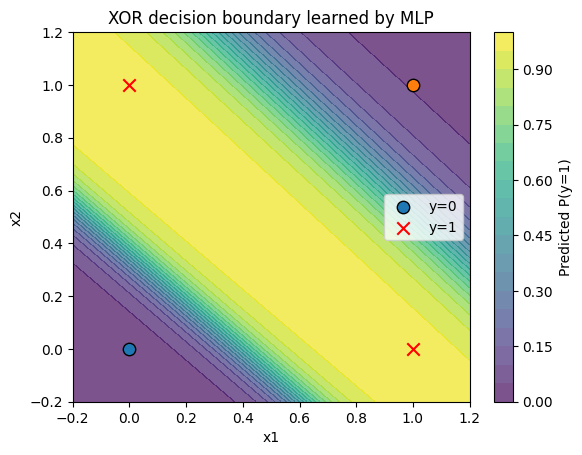

In [35]:
# ==========================
# 查看模型在四个点上的预测
# ==========================

y_pred = xor_model.predict(X_xor)
print("Predicted probabilities:\n", y_pred)

# 四舍五入到 0/1 看分类效果
y_pred_label = (y_pred > 0.5).astype(int)
print("Predicted labels:\n", y_pred_label)

print("Ground truth:\n", y_xor.astype(int))

# ==========================
# 绘制 XOR 决策边界
# ==========================

# 构造一个 0~1 区间的网格，密度高一点用于画图
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 200),
    np.linspace(-0.2, 1.2, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]      # shape: (200*200, 2)
zz = xor_model.predict(grid)
zz = zz.reshape(xx.shape)

plt.figure()
# 使用 contourf 画出预测概率等高线
cs = plt.contourf(xx, yy, zz, levels=20, alpha=0.7)
plt.colorbar(cs, label="Predicted P(y=1)")

# 把原始四个样本点画上去
for (x1, x2), y in zip(X_xor, y_xor.ravel()):
    if y == 0:
        plt.scatter(x1, x2, marker='o', edgecolor='k', s=80, label="y=0" if "y=0" not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(x1, x2, marker='x', color='red', s=80, label="y=1" if "y=1" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR decision boundary learned by MLP")
plt.show()


# 试试只有 1 个隐藏神经元会怎样？

In [37]:
# ==========================
# 尝试只有 1 个隐藏神经元的网络
# 看看能不能学会 XOR
# ==========================

tf.random.set_seed(0)
np.random.seed(0)

xor_model_1_unit = keras.Sequential([
    layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
    layers.Dense(units=1, activation='sigmoid')
])

xor_model_1_unit.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_1 = xor_model_1_unit.fit(
    X_xor, y_xor, epochs=500, batch_size=4, verbose=1
)

print("Final loss (1 hidden unit):", history_1.history["loss"][-1])
print("Final accuracy (1 hidden unit):", history_1.history["accuracy"][-1])

y_pred_1 = xor_model_1_unit.predict(X_xor)
print("Predicted probs:\n", y_pred_1)
print("Predicted labels:\n", (y_pred_1 > 0.5).astype(int))
print("Ground truth:\n", y_xor.astype(int))


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5000 - loss: 0.7723
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7473
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7302
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7184
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7104
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7049
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7012
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.6987
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6970
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.6958
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.6950
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - l

# Part 2：二维函数回归（Regression）

In [38]:
# ==========================
# 定义目标函数 f(x, y)
# ==========================

def f_xy(x, y):
    """
    目标函数 f(x, y)
    输入 x, y 可以是标量，也可以是 numpy 数组（广播）
    """
    term1 = -(x * (x - 1) + y * (1 - y))
    term2 = 0.5 * np.cos(x * y) * np.sin(2 * x + y)
    return term1 + term2


# ==========================
# 构造一批训练数据
# ==========================

def generate_data(n_samples=5000, low=-3.0, high=3.0, use_poly_features=False):
    """
    随机在 [low, high] × [low, high] 里采样点 (x, y)，
    计算对应 f(x, y) 作为回归目标值。

    参数：
      n_samples: 样本数量
      low, high: 采样范围
      use_poly_features: 是否使用多项式特征 (x, y, x^2, xy, y^2)

    返回：
      X: 形状 (n_samples, d) 的输入
      y: 形状 (n_samples, 1) 的目标值
    """
    x = np.random.uniform(low, high, size=(n_samples, 1))
    y = np.random.uniform(low, high, size=(n_samples, 1))

    z = f_xy(x, y)  # shape: (n_samples, 1)

    if use_poly_features:
        # 构造特征 [x, y, x^2, xy, y^2]
        x2 = x**2
        xy = x * y
        y2 = y**2
        X = np.concatenate([x, y, x2, xy, y2], axis=1)
    else:
        # 普通的原始特征 [x, y]
        X = np.concatenate([x, y], axis=1)

    return X.astype(np.float32), z.astype(np.float32)


# 先看看输出范围大概是什么样
X_demo, z_demo = generate_data(n_samples=5)
print("X_demo:\n", X_demo)
print("z_demo:\n", z_demo)


X_demo:
 [[ 0.2929  0.8754]
 [ 1.2911 -0.3745]
 [ 0.6166  2.3506]
 [ 0.2693  2.782 ]
 [-0.4581 -0.6994]]
z_demo:
 [[0.5788]
 [0.4947]
 [3.3853]
 [5.089 ]
 [0.0465]]


# 画真值函数的等高线图

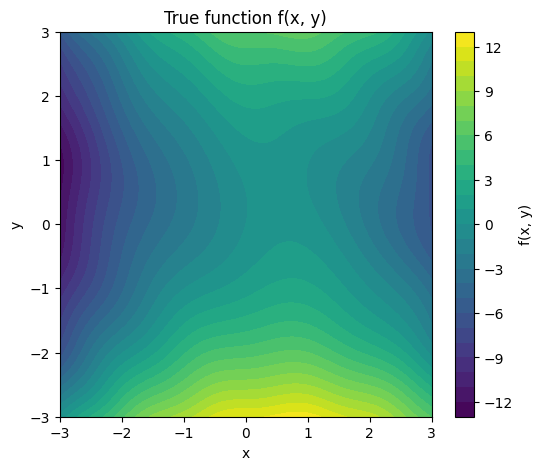

In [15]:
# ==========================
# 可视化真实的 f(x, y) 等高线
# ==========================

# 构造网格用于画图
grid_x = np.linspace(-3, 3, 100)
grid_y = np.linspace(-3, 3, 100)
gx, gy = np.meshgrid(grid_x, grid_y)

gz = f_xy(gx, gy)

plt.figure(figsize=(6, 5))
cs = plt.contourf(gx, gy, gz, levels=30)
plt.colorbar(cs, label="f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("True function f(x, y)")
plt.show()


# 搭回归网络（原始特征 x, y）

In [16]:
# ==========================
# 使用原始特征 [x, y] 搭建回归网络
# ==========================

# 构造训练集 & 验证集
X_train, y_train = generate_data(n_samples=8000, use_poly_features=False)
X_val, y_val = generate_data(n_samples=2000, use_poly_features=False)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# 搭建一个简单的全连接回归网络
tf.random.set_seed(123)

reg_model = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(2,)),  # 第一层隐藏层
    layers.Dense(64, activation='tanh'),                    # 第二层隐藏层
    layers.Dense(1, activation='linear')                    # 输出层，线性输出用于回归
])

reg_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',                     # 回归常用：均方误差
    metrics=['mae']                 # 监控 MAE 平均绝对误差
)

reg_model.summary()


X_train shape: (8000, 2)
y_train shape: (8000, 1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

# 训练回归模型

In [17]:
# ==========================
# 训练回归网络
# ==========================

history_reg = reg_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    verbose=0
)

print("Final train loss:", history_reg.history["loss"][-1])
print("Final val loss:", history_reg.history["val_loss"][-1])


Final train loss: 0.028175724670290947
Final val loss: 0.028388500213623047


# 画回归训练曲线

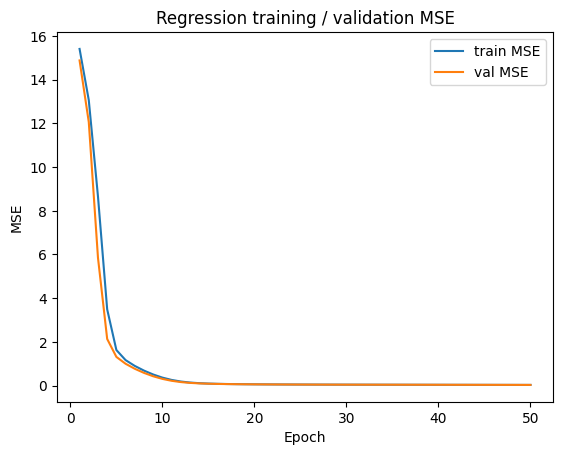

In [18]:
# ==========================
# 可视化训练 & 验证误差
# ==========================

epochs = range(1, len(history_reg.history["loss"]) + 1)

plt.figure()
plt.plot(epochs, history_reg.history["loss"], label="train MSE")
plt.plot(epochs, history_reg.history["val_loss"], label="val MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Regression training / validation MSE")
plt.show()


# 可视化网络学到的函数

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


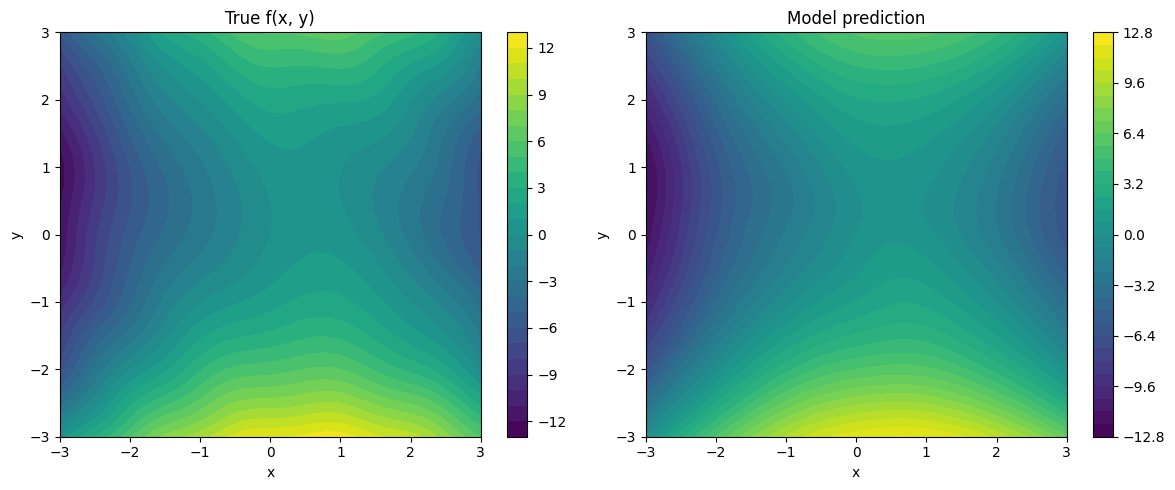

In [19]:
# ==========================
# 在网格上评估模型输出 并画等高线图
# ==========================

grid = np.c_[gx.ravel(), gy.ravel()].astype(np.float32)
gz_pred = reg_model.predict(grid)
gz_pred = gz_pred.reshape(gx.shape)

plt.figure(figsize=(12, 5))

# 左边：真实 f(x, y)
plt.subplot(1, 2, 1)
cs1 = plt.contourf(gx, gy, gz, levels=30)
plt.colorbar(cs1)
plt.title("True f(x, y)")
plt.xlabel("x")
plt.ylabel("y")

# 右边：网络预测
plt.subplot(1, 2, 2)
cs2 = plt.contourf(gx, gy, gz_pred, levels=30)
plt.colorbar(cs2)
plt.title("Model prediction")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()


# 加入多项式特征 (x, y, x², xy, y²) 再试一次

In [40]:
# ==========================
# 使用多项式特征 [x, y, x^2, xy, y^2]
# 对同一个函数做回归
# ==========================

X_train_poly, y_train_poly = generate_data(n_samples=8000, use_poly_features=True)
X_val_poly, y_val_poly = generate_data(n_samples=2000, use_poly_features=True)

print("X_train_poly shape:", X_train_poly.shape)

tf.random.set_seed(456)

reg_model_poly = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(5,)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1, activation='linear')
])

reg_model_poly.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

history_poly = reg_model_poly.fit(
    X_train_poly, y_train_poly,
    validation_data=(X_val_poly, y_val_poly),
    epochs=50,
    batch_size=128,
    verbose=1
)

reg_model_poly.summary()

print("Final train loss (poly):", history_poly.history["loss"][-1])
print("Final val loss (poly):", history_poly.history["val_loss"][-1])


X_train_poly shape: (8000, 5)
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7472 - mae: 1.5446 - val_loss: 1.1420 - val_mae: 0.8241
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9026 - mae: 0.6994 - val_loss: 0.7093 - val_mae: 0.6254
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5960 - mae: 0.5638 - val_loss: 0.4717 - val_mae: 0.5129
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3941 - mae: 0.4629 - val_loss: 0.3087 - val_mae: 0.4200
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2596 - mae: 0.3793 - val_loss: 0.1989 - val_mae: 0.3394
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1721 - mae: 0.3106 - val_loss: 0.1335 - val_mae: 0.2802
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1203 - mae: 0.2636 - val_loss: 0.0961 - val_mae: 0.2412
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0929 - mae: 0.2370 - val_loss: 0.0784 - val_mae: 0.2220
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,829 (54.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,220 (36.02 KB)

Final train loss (poly): 0.018447870388627052
Final val loss (poly): 0.01889684982597828


# 可视化多项式特征版本的拟合效果

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


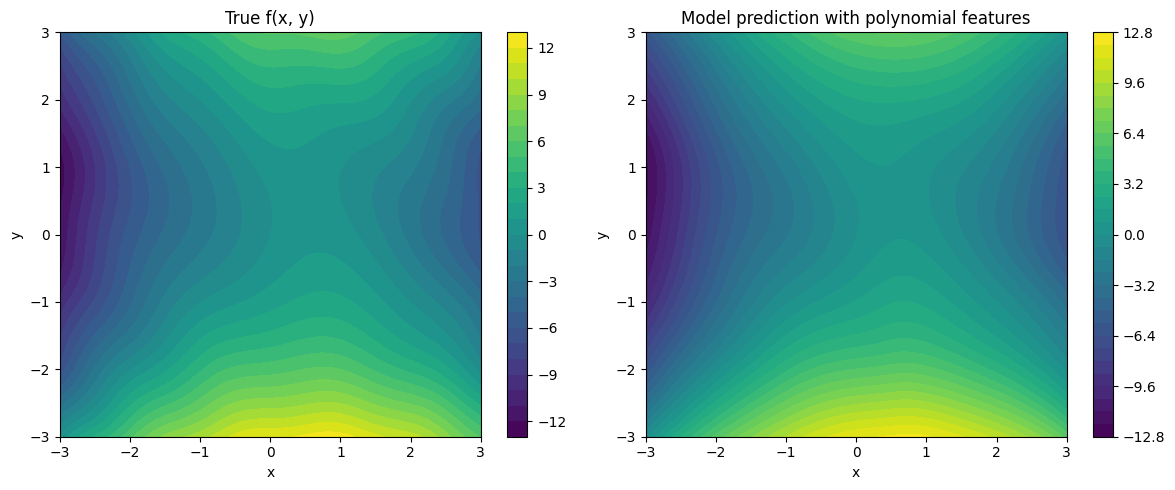

In [41]:
# ==========================
# 可视化多项式特征模型的预测
# ==========================

# 注意现在输入需要变成 [x, y, x^2, xy, y^2]
x_flat = gx.ravel().reshape(-1, 1)
y_flat = gy.ravel().reshape(-1, 1)
x2_flat = x_flat**2
xy_flat = x_flat * y_flat
y2_flat = y_flat**2

grid_poly = np.concatenate([x_flat, y_flat, x2_flat, xy_flat, y2_flat], axis=1).astype(np.float32)

gz_pred_poly = reg_model_poly.predict(grid_poly)
gz_pred_poly = gz_pred_poly.reshape(gx.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cs1 = plt.contourf(gx, gy, gz, levels=30)
plt.colorbar(cs1)
plt.title("True f(x, y)")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
cs2 = plt.contourf(gx, gy, gz_pred_poly, levels=30)
plt.colorbar(cs2)
plt.title("Model prediction with polynomial features")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()


# Part 3：FashionMNIST 分类

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)


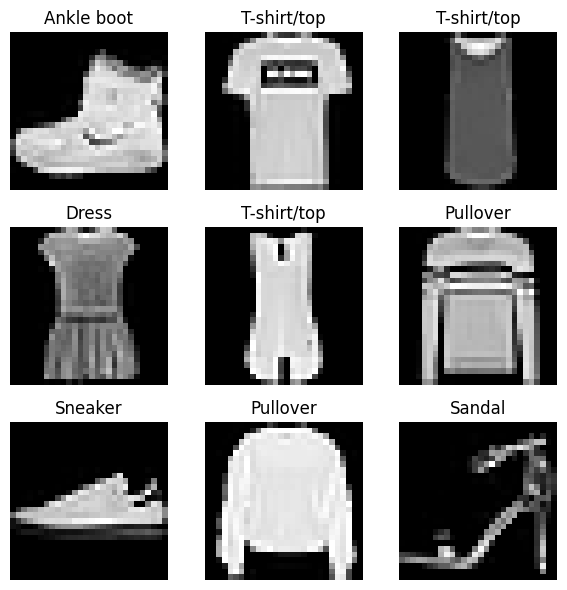

In [22]:
# ==========================
# FashionMNIST 数据集
# ==========================

from tensorflow.keras.datasets import fashion_mnist

# 加载数据：训练集 & 测试集
(X_train_f, y_train_f), (X_test_f, y_test_f) = fashion_mnist.load_data()

print("Train images shape:", X_train_f.shape)  # (60000, 28, 28)
print("Train labels shape:", y_train_f.shape)
print("Test images shape:", X_test_f.shape)

# 类别名称（按官方顺序）
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot"
]

# 先画几个样本看看
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_f[i], cmap="gray")
    plt.title(class_names[y_train_f[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


# 预处理（归一化 & 展平）

In [23]:
# ==========================
# 预处理：像素归一化 + 展平成向量
# ==========================

# 将像素值从 [0, 255] 变到 [0, 1]
X_train_f = X_train_f.astype("float32") / 255.0
X_test_f = X_test_f.astype("float32") / 255.0

# 展平：28x28 -> 784 维向量
X_train_vec = X_train_f.reshape(-1, 28*28)
X_test_vec = X_test_f.reshape(-1, 28*28)

print("X_train_vec shape:", X_train_vec.shape)
print("X_test_vec shape:", X_test_vec.shape)


X_train_vec shape: (60000, 784)
X_test_vec shape: (10000, 784)


# 搭建一个简单的 MLP 分类器

In [24]:
# ==========================
# 搭建 FashionMNIST 分类的 MLP 模型
# ==========================

tf.random.set_seed(789)

fashion_model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 类 softmax 输出
])

fashion_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',  # labels 是整数 0~9
    metrics=['accuracy']
)

fashion_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# 训练 FashionMNIST 模型

In [25]:
# ==========================
# 训练 FashionMNIST 分类器
# ==========================

history_fashion = fashion_model.fit(
    X_train_vec, y_train_f,
    epochs=10,                # 跑 10 个 epoch，够你感觉学习曲线
    batch_size=128,
    validation_split=0.1,     # 从训练集中划 10% 做验证
    verbose=1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8138 - loss: 0.5256 - val_accuracy: 0.8517 - val_loss: 0.4034
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8640 - loss: 0.3754 - val_accuracy: 0.8617 - val_loss: 0.3788
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8801 - loss: 0.3318 - val_accuracy: 0.8713 - val_loss: 0.3462
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8877 - loss: 0.3044 - val_accuracy: 0.8785 - val_loss: 0.3327
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8959 - loss: 0.2832 - val_accuracy: 0.8773 - val_loss: 0.3293
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.2679 - val_accuracy: 0.8832 - val_loss: 0.3239
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.2545 - val_accuracy: 0.8875 - val_loss: 0.3164
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9122 - loss: 0.2418 - val_accuracy: 0.

# 画 loss & accuracy

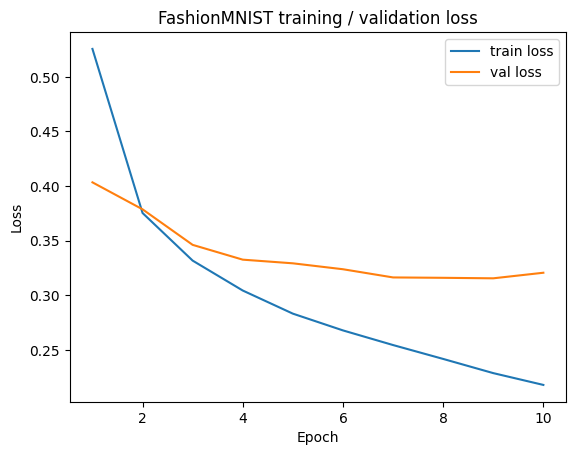

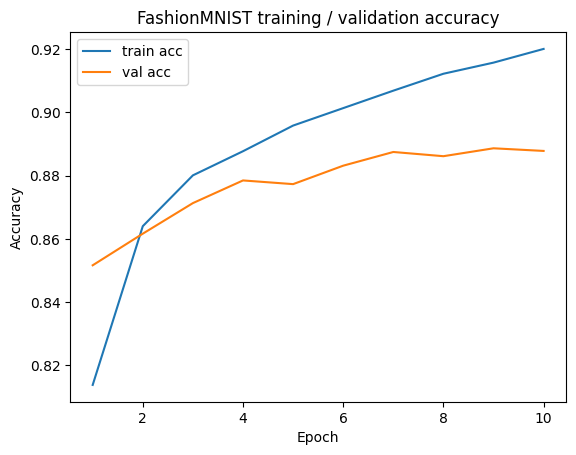

In [26]:
# ==========================
# 可视化 FashionMNIST 训练曲线
# ==========================

epochs = range(1, len(history_fashion.history["loss"]) + 1)

plt.figure()
plt.plot(epochs, history_fashion.history["loss"], label="train loss")
plt.plot(epochs, history_fashion.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("FashionMNIST training / validation loss")
plt.show()

plt.figure()
plt.plot(epochs, history_fashion.history["accuracy"], label="train acc")
plt.plot(epochs, history_fashion.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("FashionMNIST training / validation accuracy")
plt.show()


# 在测试集上评估 & 看看预测结果

Test loss: 0.34495633840560913
Test accuracy: 0.8855000138282776


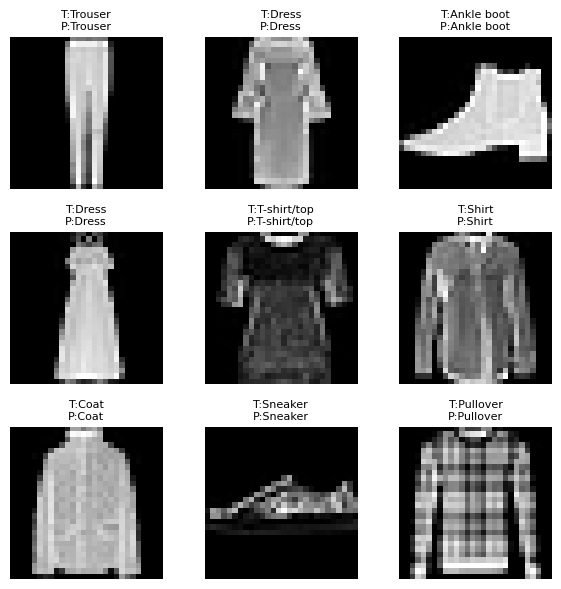

In [27]:
# ==========================
# 在测试集上评估性能
# ==========================

test_loss, test_acc = fashion_model.evaluate(X_test_vec, y_test_f, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


# ==========================
# 随机看几个预测结果
# ==========================

num_to_show = 9
idxs = np.random.choice(len(X_test_f), size=num_to_show, replace=False)

plt.figure(figsize=(6, 6))
for i, idx in enumerate(idxs):
    img = X_test_f[idx]
    true_label = y_test_f[idx]

    # 模型预测（注意要展平）
    pred = fashion_model.predict(img.reshape(1, -1), verbose=0)
    pred_label = np.argmax(pred[0])

    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap="gray")
    title = f"T:{class_names[true_label]}\nP:{class_names[pred_label]}"
    plt.title(title, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()
